In [1]:
import matplotlib.pylab as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import warnings 
warnings.simplefilter('ignore')

from proj2_helpers import *
from get_embeddings_ML import *

### DATA LOADING

In [2]:
DIM_EMB = 20

In [3]:
COOC_PATH = './Results/cooc.pkl'
VOC_PATH = './Results/vocab.pkl'
EMBEDDINGS_PATH = './Results/embeddings.npy'
RESULT_POS_PATH = './Results/resPtrain_nd.txt'
RESULT_NEG_PATH = './Results/resNtrain_nd.txt'

In [4]:
#load pickle files
cooc_matrix = open_pickle_file(COOC_PATH)
vocabulary = open_pickle_file(VOC_PATH)

# load numpy files 
embeddings = np.load(EMBEDDINGS_PATH)

# load the data files = list with each line being a tweet
result_pos = open(RESULT_POS_PATH, "r").read().splitlines()
result_neg = open(RESULT_NEG_PATH, "r").read().splitlines()

### EXTRACTING MEAN WORD VECTORS ON TRAIN SET

In [5]:
full_df, X, y = process_train_ML(result_pos, result_neg, vocabulary, embeddings, DIM_EMB)

> process pos and neg datas to get X and y to perform ML
> extracting mean of word vectors
> extracting mean of word vectors
> X and y informations:
X shape: (172894, 20)
y shape: (172894,)


In [6]:
# check full_df
full_df.head()

,Sentiment,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
78089,1,'something already know',"[106, 148, 4]","[[-0.15601133777722814, 0.5103517196909816, -0...","[-0.2167531089425446, 0.4137084466302103, -0.1..."
30436,1,'omg emily love poem good writer hope get',"[104, 2480, 1, 2269, 3, 1576, 45, 0]","[[-0.17587936798303583, 0.1557055493558504, -0...","[-0.27453745934545765, 0.3027607534198825, -0...."
101060,-1,'ahh fuck dislocated shoulder',"[272, 85, 1036]","[[-0.598561481010539, 0.2665499652626643, -0.1...","[-0.312526553749823, 0.09994756633141161, 0.05..."
63854,1,'use theta',[103],"[[0.09282175004277597, -0.005613068669178651, ...","[0.09282175004277597, -0.005613068669178651, -..."
70999,1,'today good day watch glee end',"[23, 3, 5, 42, 1400, 176]","[[-0.44960083705992376, 0.43357049515269874, -...","[-0.48591243660030514, 0.3855489828919015, -0...."


### MINMAXSCALER AND PCA ON TRAIN SETS

In [7]:
scaler = MinMaxScaler(feature_range=[0, 1])

In [8]:
X_rescaled = scaler.fit_transform(X)

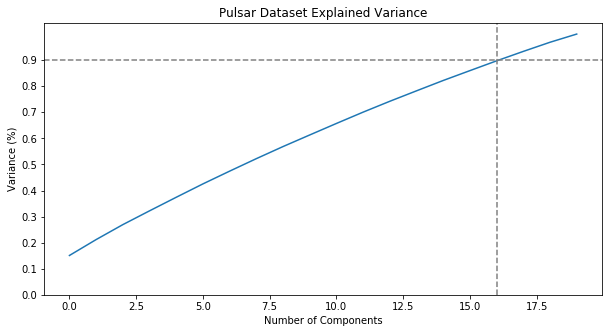

In [9]:
#Fitting the PCA algorithm with our Data
pca = PCA().fit(X_rescaled)
#Plotting the Cumulative Summation of the Explained Variance
fig = plt.figure(figsize=(10,5))
x=np.cumsum(pca.explained_variance_ratio_)
plt.plot(x)
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Pulsar Dataset Explained Variance')
plt.yticks(np.arange(0, 1, 0.1))
plt.axhline(y=0.9,color='gray',linestyle='--')
plt.axvline(x=16,color='gray',linestyle='--')
plt.show()

We see that we have selecting 16 components we can preserve something around 90% of the total variance of the data.

In [10]:
pca = PCA(n_components=16)
dataset = pca.fit_transform(X_rescaled)

### TRYING SVM FITTING: SEEING ACCURACY BY SPLITTING THE DATASET IN A TEST AND A TRAIN SET

In [11]:
X_train, X_test, y_train, y_test = train_test_split(dataset, y, random_state=0)

In [12]:
clf = linear_model.LogisticRegression(C=1e5,\
max_iter=10000,n_jobs=-1).fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [13]:
cm = confusion_matrix(y_test, y_pred)
accuracy = (cm[0][0] + cm[1][1]) / (cm[0][0] + cm[0][1] + cm[1][0] + cm[1][1])

In [14]:
accuracy

0.5874514158800667

### EXTRACTING MEAN WORD VECTOR ON TEST SETS

In [15]:
RES_PATH = './Results/result_test.txt'
test_set = open(RES_PATH, "r").read().splitlines()

In [16]:
test_df, X_test = process_test_ML(test_set, vocabulary, embeddings, DIM_EMB)

> process test data to get X_test and perform ML
> extracting mean of word vectors
> X_test informations:
X_test shape: (10000, 20)


In [17]:
# check full_df
test_df.head()

,Tweet_submission_id,Tweet,Token_idx,Words_Vectors,Mean_Word_Vector
0,1,sea doo pro sea scooter sport portable sea doo...,"[1079, 2077, 488, 1079, 4060, 436, 1951, 1079,...","[[0.7545771418230769, 0.5417753466067821, -0.3...","[0.17359848973525313, 0.6739966900020333, -0.4..."
1,2,shuck well work week come cheer put battery ca...,"[7242, 22, 27, 77, 16, 460, 156, 378, 6804]","[[-1.2264067940250245, 0.15497394762378422, 0....","[-0.4337431112273248, 0.2020129000933508, -0.2..."
2,3,stay away bug that baby,"[162, 171, 1375, 166, 76]","[[-0.3056082730359473, 0.3002315203895117, -0....","[-0.3436857359354798, 0.19822519439318748, -0...."
3,4,madam lol perfectly fine contagious anymore mao,"[2300, 7, 2873, 301, 6481, 240, 131]","[[0.9504541835268531, 0.21418896359570821, -0....","[0.5329097936052202, -0.18495738575262563, 0.1..."
4,5,whenever fall asleep watch always wake headache,"[1113, 330, 603, 42, 63, 223, 817]","[[-0.9415122235016096, -0.9807237355649092, -1...","[-0.04126264263608654, 0.15105353028164056, -0..."


### MINMAXSCALER AND PCA ON TEST SETS

In [18]:
test_rescaled = scaler.fit_transform(X_test)

In [19]:
pca = PCA(n_components=16)
test = pca.fit_transform(test_rescaled)

In [20]:
# TRAIN LR ON WHOLE TRAINING SET
clf = linear_model.LogisticRegression(C=1e5,\
max_iter =10000,n_jobs=-1).fit(dataset, y)
y_pred = clf.predict(test)

In [21]:
len(y_pred)

10000

### CREATE A SUBMISSION

In [22]:
test_id = test_df['Tweet_submission_id'].to_numpy()

In [23]:
len(test_id)

10000

In [24]:
create_csv_submission(test_id,y_pred,"./Submissions/LR_SUB.csv")